In [1]:
import numpy as np
from pandas import DataFrame

def farray(*args, **kwargs):
    kwargs.setdefault("dtype", np.float32)
    return np.array(*args, **kwargs)

def calcDistances_l1(xs,ys,cxs,cys):
    return np.array([
        [(np.abs(x-cx)+np.abs(y-cy)) for (x,y) in zip(xs,ys)]
        for (cx,cy) in zip(centerx,centery)
    ])

def calcDistances_l2(xs,ys,cxs,cys):
    return np.array([
        [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in zip(xs,ys)]
        for (cx,cy) in zip(centerx,centery)
    ])


def iff(array, f):
    r = np.empty(array.shape)
    for (i,j), v in np.ndenumerate(array):
        r[i,j] = f(i,j,v)
    return r

In [2]:
xs = farray([ 0.0,4,0,-5])
ys = farray([-6.0,4,0, 2])
ka = np.array([float("nan"),float("nan"),float("nan"),float("nan")])

In [3]:
centerx = farray([-5.0,0])
centery = farray([ 2, -6])

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(xs,ys,xa,centerx,centery):
    print(xs,ys,xa)
    plt.scatter(centerx, centery, c="white", edgecolors="black", s=100)
    plt.scatter(xs, ys, c= np.nan_to_num(xa), cmap="Set1")    
    plt.show()

def step_kmeans(xs, ys, centerx, centery):
    ds = calcDistances_l1(xs, ys, centerx, centery)
    
    print("distances", DataFrame(ds))
    print("mins", np.min(ds, axis=0))
    print("mins idxs", np.argmin(ds, axis=0))
    
    mins = np.min(ds, axis=0)
    minsi = np.argmin(ds, axis=0)
    
    newcenterx_temp = iff(ds, lambda i,j,v: xs[j] if minsi[j]==i else None)
    newcentery_temp = iff(ds, lambda i,j,v: ys[j] if minsi[j]==i else None)
    
    counts = np.count_nonzero(~np.isnan(newcenterx_temp), axis=1)
    newcenterx = np.nansum(newcenterx_temp, axis=1) / counts
    newcentery = np.nansum(newcentery_temp, axis=1) / counts
    
    print("old", centerx, centery)
    print("new", newcenterx, newcentery)
    
    print(minsi)
    print(np.nansum(newcenterx_temp, axis=1), counts, newcenterx)
    print(np.nansum(newcentery_temp, axis=1), counts, newcentery)
    
    return (minsi, newcenterx, newcentery)

[ 0.  4.  0. -5.] [-6.  4.  0.  2.] [nan nan nan nan]


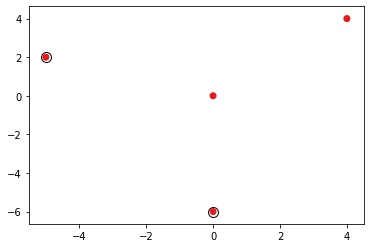

distances       0     1    2     3
0  13.0  11.0  7.0   0.0
1   0.0  14.0  6.0  13.0
mins [ 0. 11.  6.  0.]
mins idxs [1 0 1 0]
old [-5.  0.] [ 2. -6.]
new [-0.5  0. ] [ 3. -3.]
[1 0 1 0]
[-1.  0.] [2 2] [-0.5  0. ]
[ 6. -6.] [2 2] [ 3. -3.]
[ 0.  4.  0. -5.] [-6.  4.  0.  2.] [1 0 1 0]


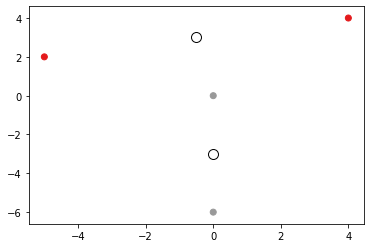

distances      0     1    2     3
0  9.5   5.5  3.5   5.5
1  3.0  11.0  3.0  10.0
mins [3.  5.5 3.  5.5]
mins idxs [1 0 1 0]
old [-0.5  0. ] [ 3. -3.]
new [-0.5  0. ] [ 3. -3.]
[1 0 1 0]
[-1.  0.] [2 2] [-0.5  0. ]
[ 6. -6.] [2 2] [ 3. -3.]
[ 0.  4.  0. -5.] [-6.  4.  0.  2.] [1 0 1 0]


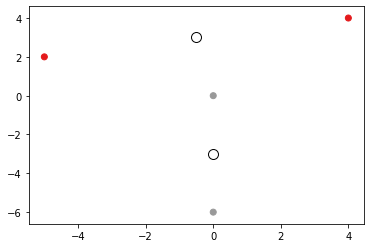

distances      0     1    2     3
0  9.5   5.5  3.5   5.5
1  3.0  11.0  3.0  10.0
mins [3.  5.5 3.  5.5]
mins idxs [1 0 1 0]
old [-0.5  0. ] [ 3. -3.]
new [-0.5  0. ] [ 3. -3.]
[1 0 1 0]
[-1.  0.] [2 2] [-0.5  0. ]
[ 6. -6.] [2 2] [ 3. -3.]
[ 0.  4.  0. -5.] [-6.  4.  0.  2.] [1 0 1 0]


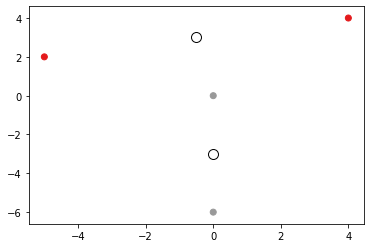

distances      0     1    2     3
0  9.5   5.5  3.5   5.5
1  3.0  11.0  3.0  10.0
mins [3.  5.5 3.  5.5]
mins idxs [1 0 1 0]
old [-0.5  0. ] [ 3. -3.]
new [-0.5  0. ] [ 3. -3.]
[1 0 1 0]
[-1.  0.] [2 2] [-0.5  0. ]
[ 6. -6.] [2 2] [ 3. -3.]
[ 0.  4.  0. -5.] [-6.  4.  0.  2.] [1 0 1 0]


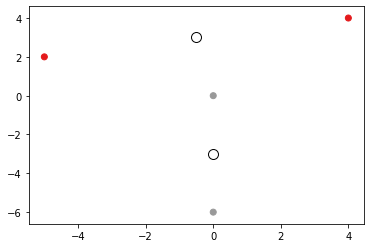

distances      0     1    2     3
0  9.5   5.5  3.5   5.5
1  3.0  11.0  3.0  10.0
mins [3.  5.5 3.  5.5]
mins idxs [1 0 1 0]
old [-0.5  0. ] [ 3. -3.]
new [-0.5  0. ] [ 3. -3.]
[1 0 1 0]
[-1.  0.] [2 2] [-0.5  0. ]
[ 6. -6.] [2 2] [ 3. -3.]
[ 0.  4.  0. -5.] [-6.  4.  0.  2.] [1 0 1 0]


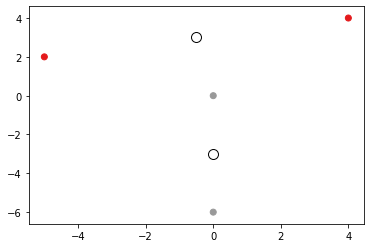

distances      0     1    2     3
0  9.5   5.5  3.5   5.5
1  3.0  11.0  3.0  10.0
mins [3.  5.5 3.  5.5]
mins idxs [1 0 1 0]
old [-0.5  0. ] [ 3. -3.]
new [-0.5  0. ] [ 3. -3.]
[1 0 1 0]
[-1.  0.] [2 2] [-0.5  0. ]
[ 6. -6.] [2 2] [ 3. -3.]
[ 0.  4.  0. -5.] [-6.  4.  0.  2.] [1 0 1 0]


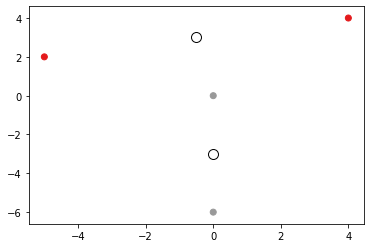

end [1 0 1 0] [-0.5  0. ] [ 3. -3.]


In [5]:
plot(xs,ys,ka,centerx,centery)
ka,centerx,centery = step_kmeans(xs, ys, centerx, centery)
plot(xs,ys,ka,centerx,centery)
ka,centerx,centery = step_kmeans(xs, ys, centerx, centery)
plot(xs,ys,ka,centerx,centery)
ka,centerx,centery = step_kmeans(xs, ys, centerx, centery)
plot(xs,ys,ka,centerx,centery)
ka,centerx,centery = step_kmeans(xs, ys, centerx, centery)
plot(xs,ys,ka,centerx,centery)
ka,centerx,centery = step_kmeans(xs, ys, centerx, centery)
plot(xs,ys,ka,centerx,centery)
ka,centerx,centery = step_kmeans(xs, ys, centerx, centery)
plot(xs,ys,ka,centerx,centery)
print("end", ka, centerx, centery)